# Fraud fetection model

## 1.Import Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

## 2.Load Data

In [21]:
df=pd.read_csv('/content/Fraud.csv')

## 3.Explore data

In [22]:
df.shape

(165439, 11)

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165439 entries, 0 to 165438
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            165439 non-null  int64  
 1   type            165439 non-null  object 
 2   amount          165439 non-null  float64
 3   nameOrig        165439 non-null  object 
 4   oldbalanceOrg   165439 non-null  float64
 5   newbalanceOrig  165439 non-null  float64
 6   nameDest        165439 non-null  object 
 7   oldbalanceDest  165438 non-null  float64
 8   newbalanceDest  165438 non-null  float64
 9   isFraud         165438 non-null  float64
 10  isFlaggedFraud  165438 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 13.9+ MB


In [25]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,165439.000000,1.654390e+05,1.654390e+05,1.654390e+05,1.654380e+05,1.654380e+05,165438.000000,165438.0
mean,9.553715,1.793496e+05,8.862403e+05,9.031748e+05,9.229948e+05,1.185652e+06,0.000804,0.0
std,1.967747,3.360318e+05,2.812176e+06,2.848990e+06,2.380862e+06,2.690358e+06,0.028342,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.141030e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.376490e+04,1.951200e+04,0.000000e+00,3.956590e+04,1.070278e+05,0.000000,0.0
75%,11.000000,2.248438e+05,1.901025e+05,2.227964e+05,7.106599e+05,1.144234e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.894623e+07,3.904248e+07,1.000000,0.0


## missing value checking for outlier

In [26]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [27]:
#rempve null values
df=df.dropna()

,0
step,"Axes(0.125,0.712609;0.168478x0.167391)"
amount,"Axes(0.327174,0.712609;0.168478x0.167391)"
oldbalanceOrg,"Axes(0.529348,0.712609;0.168478x0.167391)"
newbalanceOrig,"Axes(0.731522,0.712609;0.168478x0.167391)"
oldbalanceDest,"Axes(0.125,0.511739;0.168478x0.167391)"
newbalanceDest,"Axes(0.327174,0.511739;0.168478x0.167391)"
isFraud,"Axes(0.529348,0.511739;0.168478x0.167391)"
isFlaggedFraud,"Axes(0.731522,0.511739;0.168478x0.167391)"


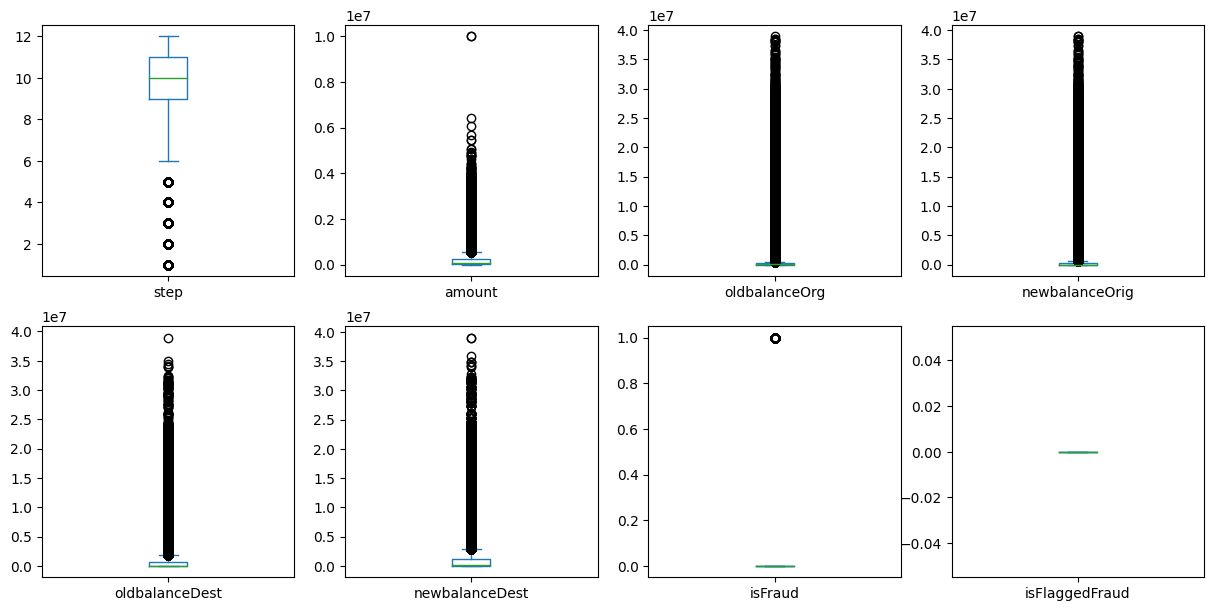

In [28]:
#plot outlier using boxplot
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,15))

In [29]:
df.type .value_counts()

,count
type,
PAYMENT,62237
CASH_OUT,54182
CASH_IN,33762
TRANSFER,13779
DEBIT,1478


In [30]:
type=df['type'].value_counts()
transactions=type.index
quantity=type.values

import plotly.express as px
figure=px.pie(df, values=quantity,
              names=transactions,hole=0.5,
              title='Distribution of Transaction Type')
figure.show()

In [31]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


## feature selection

In [32]:
#drop newOrig and newDest
df=df.drop(['nameOrig','nameDest'],axis=1)

## mapping and encoding  

In [33]:
#mapping the column type and  isfraud
df['type']=df['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})

In [34]:
correlation = df.corr()
correlation['isFraud'].sort_values(ascending=False)

,isFraud
isFraud,1.000000
amount,0.036147
type,0.012250
oldbalanceOrg,-0.002860
newbalanceDest,-0.005302
oldbalanceDest,-0.008267
newbalanceOrig,-0.008740
step,-0.044940
isFlaggedFraud,NaN


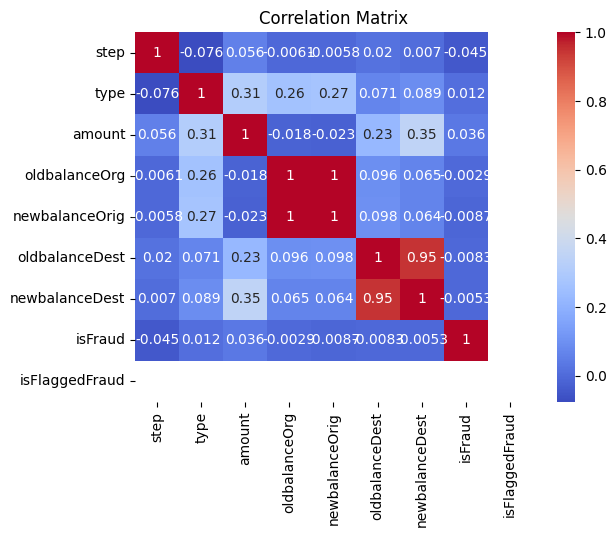

In [35]:
# Calculate the correlation matrix on the numerical columns
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [36]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [37]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,0.0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,Fraud,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,Fraud,0.0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,0.0


## splitting

In [38]:
#split the data
x=np.array(df[['type','amount','oldbalanceOrg','newbalanceOrig']])
y=np.array(df[['isFraud']])

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

## model selection

In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
model.score(x_test,y_test)

0.9993955512572534

In [42]:
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[2,	9839.64,	170136.0,	160296.36	]])
print(model.predict(features))

['No Fraud']


In [43]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
print(model2.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.999637330754352


In [44]:
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[2,	9839.64,	170136.0,	160296.36	]])
print(model.predict(features))

['No Fraud']


In [45]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train,y_train)
print(model3.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9995768858800773


In [46]:
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[2,	9839.64,	170136.0,	160296.36	]])
print(model.predict(features))

['No Fraud']


## Hyperparameter tuning using Random Forest with GridSearchCV for efficiency.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#define the model
model = RandomForestClassifier(random_state=42)

#Set up a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
#Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

#print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

#Evaluate the model with the best parameters
best_model = grid_search.best_estimator_

# Predicting on test data
y_pred = best_model.predict(x_test)

# Evaluating the tuned model
from sklearn.metrics import accuracy_score, classification_report

print("Random Forest Tuned Model Accuracy:", accuracy = accuracy_score(y_test, y_pred))
print("Random Forest Tuned Model Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


For fraud detection, I use several classification models such as:

Random Forest: Effective due to its ability to capture nonlinear relationships and handle imbalanced datasets.

Decision Tree: A simple and interpretable model.

SVM: Captures complex relationships with feature scaling, but computationally expensive.


These models detect fraudulent transactions based on historical behavior. Random Forest, being an ensemble method, often performs well in fraud detection scenarios as it combines multiple decision trees to reduce overfitting and improve accuracy.

I selected the variables based on:


Business relevance: Variables like amount, oldbalanceOrg, newbalanceOrig, and transaction type (type) are critical to detecting fraud.


Feature importance from exploratory data analysis (EDA). Using Random Forest's feature importance function, we can rank features by their relevance to the target variable (isFraud).

Based on feature importance analysis, the key factors are:


Transaction amount: Large and unusual transactions often indicate fraud.

Old and new balances: Significant changes in the account balance can signal suspicious activity.


Type of transaction: Fraudulent activities are more common in certain types like TRANSFER and CASH_OUT.


Destination account behavior: Zero or very low oldbalanceDest and newbalanceDest can point to suspicious recipients.

Yes, these factors make sense:


Transaction amount: Large transactions beyond a customer’s regular activity are typical fraud indicators.

Old/New balances: Sudden emptying or inflating of balances could signal fraud.

Transaction type: Transfers and cash-outs are riskier compared to payments to merchants.

These factors align with real-world fraud detection mechanisms where unusual transaction amounts, the type of transfer, and sudden changes in balance are red flags.

To prevent fraud, companies should:


Implement anomaly detection systems using machine learning to monitor transactions in real-time.

Multi-factor authentication (MFA) to secure accounts and validate high-risk transactions.

Limit transfer amounts for high-risk transactions, especially those involving new or suspicious recipients.

Monitor customer behavior patterns: Use historical data to flag transactions that deviate from normal activity.

Regular infrastructure updates: Ensure the security of systems by patching vulnerabilities and encrypting data.

To evaluate if preventive actions work:



Monitor fraud incidence rates: Compare the number of fraudulent transactions before and after implementing the measures.

Use feedback loops: Adjust models based on emerging patterns in fraudulent activities.

Customer feedback: Gather feedback from customers on suspicious activity alerts or blocked transactions.

Audit logs and reports: Regularly review logs of flagged transactions, successful frauds, and attempted frauds.